In [0]:
# %cd /content/colab_demo/
# !git pull


In [1]:
# Restart runtime using 'Runtime' -> 'Restart runtime...'
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

#Clone git repos
import os
if os.getcwd() != '/content':
  %cd /content
if os.path.exists(os.path.join(os.getcwd(),"colab_demo")):
  %cd /content/colab_demo/
  !git pull
  %cd /content/models/research/
else:
  !git clone https://github.com/tensorflow/models
  !git clone https://github.com/laszlotomi/colab_demo.git 

  #isntall dependencies
  !apt-get install protobuf-compiler python-pil python-lxml python-tk
  !pip install Cython

  #Create proto files
  %cd /content/models/research/
  !protoc object_detection/protos/*.proto --python_out=.

  #set environment variables
  os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim'

  #Build app
  if os.path.exists("/content/models/research/object_detection.egg-info"):
    print("Already built!")
  else:
    !python setup.py build
    !python setup.py install

  #Run the test
  !python object_detection/builders/model_builder_test.py

%cd object_detection/

1.15.0
Found GPU at: /device:GPU:0
Cloning into 'models'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 34318 (delta 4), reused 8 (delta 0), pack-reused 34305
Receiving objects: 100% (34318/34318), 512.37 MiB | 14.57 MiB/s, done.
Resolving deltas: 100% (22016/22016), done.
Checking out files: 100% (2508/2508), done.
Cloning into 'colab_demo'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 2754 (delta 35), reused 2 (delta 0), pack-reused 2709
Receiving objects: 100% (2754/2754), 615.51 MiB | 13.16 MiB/s, done.
Resolving deltas: 100% (1086/1086), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following 

In [0]:
#Copy required files
%cp /content/colab_demo/xml_to_csv.py /content/models/research/object_detection/xml_to_csv.py
%cp /content/colab_demo/generate_tfrecord.py generate_tfrecord.py
!mkdir training
%cp /content/colab_demo/labelmap.pbtxt training/labelmap.pbtxt
%cp /content/colab_demo/configs/faster_rcnn_inception_v2_coco.config training/faster_rcnn_inception_v2_coco.config
%cp /content/colab_demo/configs/ssd_inception_v2_coco.config training/ssd_inception_v2_coco.config
%cp /content/models/research/object_detection/legacy/train.py train.py 
%cp -R /content/colab_demo/images /content/models/research/object_detection/

In [0]:
#!rm -rf /content/models/research/object_detection/images/

In [3]:
#Convert xml to csv
!python xml_to_csv.py
# for test data
!python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=test.record  --image_dir=/content/colab_demo/images/test
# for train data
!python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=train.record  --image_dir=/content/colab_demo/images/train


Successfully converted xml to csv.
Successfully converted xml to csv.
Successfully created the TFRecords: /content/models/research/object_detection/test.record
Successfully created the TFRecords: /content/models/research/object_detection/train.record


In [0]:
#%cd /content/models/research/object_detection/


In [4]:
model="faster_rcnn_inception_v2_coco_2018_01_28.tar.gz"
#model="ssd_mobilenet_v1_coco_2018_01_28.tar.gz"
url= os.path.join("http://download.tensorflow.org/models/object_detection/", model)
!wget $url
!tar -xvf $model


--2020-03-02 13:41:49--  http://download.tensorflow.org/models/object_detection/faster_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149119618 (142M) [application/x-tar]
Saving to: ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’

faster_rcnn_incepti 100%[===================>] 142.21M   167MB/s    in 0.9s    

2020-03-02 13:41:50 (167 MB/s) - ‘faster_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [149119618/149119618]

faster_rcnn_inception_v2_coco_2018_01_28/
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
faster_rcnn_inception_v2_coco_2018_01_28/checkpoint
faster_rcnn_inception_v2_coco_2018_01_28/pipeline.config
faster_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_inception_v2_coco_2018_01_28/mode

In [5]:
LOG_DIR = 'training'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
# Install
! npm install -g localtunnel
! npm i -g npm
# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url1.txt 2>&1 &')
# Get url
! cat url1.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.0
added 35 packages from 21 contributors in 2.246s
/tools/node/bin/npm -> /tools/node/lib/node_modules/npm/bin/npm-cli.js
/tools/node/bin/npx -> /tools/node/lib/node_modules/npm/bin/npx-cli.js
+ npm@6.14.1
added 326 packages from 161 contributors, removed 424 packages and updated 57 packages in 13.204s


   ╭──────────────────────────────────────╮
   │                                      │
   │   Update available 5.7.1 → 6.14.1    │
   │      Run npm i -g npm to update      │
   │                                      │
   ╰──────────────────────────────────────╯



In [6]:
!python train.py --logtostderr --train_dir=training/ --pipeline_config_path=training/faster_rcnn_inception_v2_coco.config


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Instructions for updating:
Use object_detection/model_main.py.
W0302 13:42:29.536281 139735309776768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/absl/app.py:250: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.

W0302 13:42:29.536546 139735309776768 module_wrapper.py:139] From train.py:91: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0302 13:42:29.536922 139735309776768 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:102: The name tf.g

In [0]:
%cd /content/colab_demo/
!git pull
%cd /content/models/research/object_detection


%rm -r /content/models/research/object_detection/training
%mkdir /content/models/research/object_detection/training
%cp /content/colab_demo/labelmap.pbtxt training/labelmap.pbtxt
%cp /content/colab_demo/configs/faster_rcnn_inception_v2_coco.config training/faster_rcnn_inception_v2_coco.config
#%cp /content/colab_demo/configs/pipeline.config training/pipeline.config

In [7]:
!python export_inference_graph.py \
--input_type image_tensor \
--pipeline_config_path training/faster_rcnn_inception_v2_coco.config \
--trained_checkpoint_prefix training/model.ckpt-0 \
--output_directory My_exp_graph/

!zip -r MY_exp_g.zip My_exp_graph


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0302 13:48:59.679669 139730493536128 module_wrapper.py:139] From export_inference_graph.py:145: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0302 13:48:59.686676 139730493536128 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:402: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


W0302 13:48:59.686986 139730493536128 module_wrapper.py:139] From /content/models/research/object_detection/exporter.py:121: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


W0302 13:48:59.739450 139730493536128

In [0]:
MODEL_NAME = 'My_exp_graph'
PATH_TO_FROZEN_GRAPH = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = 'training/labelmap.pbtxt'
NUM_CLASSES = 2 

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops
%matplotlib inline
from utils import label_map_util
from utils import visualization_utils as vis_util

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_FROZEN_GRAPH, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

# Loading label map
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

#Helper code
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

import glob
TEST_IMAGE_PATHS = []
for filename in glob.iglob('./test_images/*.JPEG', recursive=True):
    TEST_IMAGE_PATHS.append(filename)
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)



In [0]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.5), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict

{1: {'id': 1, 'name': 'router'}, 2: {'id': 2, 'name': 'Router2'}}
{1: {'id': 1, 'name': 'router'}, 2: {'id': 2, 'name': 'Router2'}}


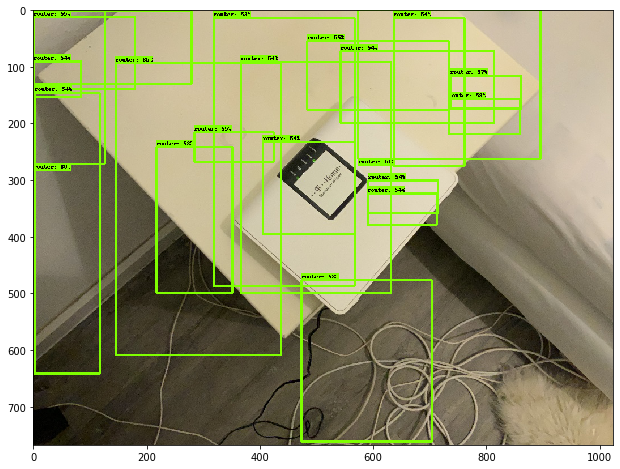

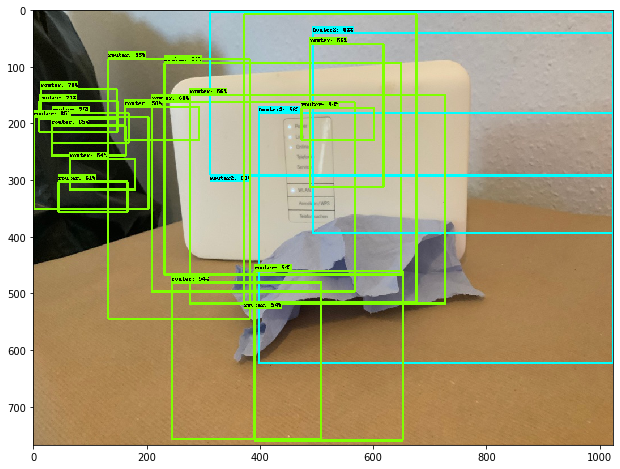

In [19]:
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=4)
  #print(category_index)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  plt.grid(False)
  